In [226]:
import pandas as pd

In [227]:
# (1) Используя параметры pandas прочитать красиво пандас 
df = pd.read_csv('UCI_Credit_Card.csv')

In [228]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
# (2) выведите, что за типы переменных, сколько пропусков,
# для численных значений посчитайте пару статистик (в свободной форме)

In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6   

In [230]:
stat=df.describe()[['EDUCATION','AGE']]
stat

,EDUCATION,AGE
count,30000.000000,30000.000000
mean,1.853133,35.485500
std,0.790349,9.217904
min,0.000000,21.000000
25%,1.000000,28.000000
50%,2.000000,34.000000
75%,2.000000,41.000000
max,6.000000,79.000000


In [231]:
stat.T[['min','50%','max']].T


,EDUCATION,AGE
min,0.0,21.0
50%,2.0,34.0
max,6.0,79.0


In [ ]:
# (3) посчитать число женщин с университетским образованием
# SEX (1 = male; 2 = female). 
# EDUCATION (1 = graduate school; 2 = university; 3 = high school; 4 = others). 

#TODO

In [237]:
df[ 
    df['SEX']==2 & (df['EDUCATION']==2)
]

#Не могу понять, почему не делает выборку, поэтому фильтрую последовательно, сначала по полю SEX, потом по EDUCATION

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month


In [238]:
df_SEX = df[ df['SEX']==2]
df_SEX_EDUCATION = df_SEX [ df_SEX['EDUCATION']==2]
df_SEX_EDUCATION.shape[0]

8656

In [ ]:
# (4) Сгрупировать по "default payment next month" и посчитать медиану для всех показателей начинающихся на BILL_ и PAY_
#TODO

In [239]:
#df[['default.payment.next.month']]

#df.iloc[0:, 6:]
#df.loc[0:, 'PAY_0':]

r_df = df_SEX_EDUCATION
# Из задания не понятно медиана считается для всего df или для выборки женщин с высшим образованием, поэтому я завел 
# r_df, который можно приравнять либо к df, либо к df_SEX_EDUCATION -(выборка по женщинам)

c_list = r_df.columns[6:] 
# Это список полей от PAY_0 до конца, содержащих BILL_ и PAY_ и последнее поле 'default.payment.next.month'
# c_list[18] - это столбец 'default.payment.next.month'

r_df[c_list].groupby(c_list[18]).median().T



default.payment.next.month,0,1
PAY_0,0.0,1.0
PAY_2,0.0,0.0
PAY_3,0.0,0.0
PAY_4,0.0,0.0
PAY_5,0.0,0.0
PAY_6,0.0,0.0
BILL_AMT1,27170.5,25946.5
BILL_AMT2,26629.0,25706.0
BILL_AMT3,25131.0,23833.5
BILL_AMT4,22444.5,21719.5


In [ ]:
# (5) постройте сводную таблицу (pivot table) по SEX, EDUCATION, MARRIAGE

df.pivot_table #TODO

In [240]:
df.pivot_table('ID','SEX','EDUCATION','count')

EDUCATION,0,1,2,3,4,5,6
SEX,,,,,,,
1,8,4354,5374,1990,42,95,25
2,6,6231,8656,2927,81,185,26


In [241]:
df.pivot_table('ID','SEX', 'MARRIAGE','count')

MARRIAGE,0,1,2,3
SEX,,,,
1,14,5190,6553,131
2,40,8469,9411,192


In [242]:
df.pivot_table('ID','EDUCATION', 'MARRIAGE','count')

MARRIAGE,0,1,2,3
EDUCATION,,,,
0,NaN,4.0,10.0,NaN
1,4.0,3722.0,6809.0,50.0
2,6.0,6842.0,7020.0,162.0
3,44.0,2861.0,1909.0,103.0
4,NaN,52.0,68.0,3.0
5,NaN,150.0,127.0,3.0
6,NaN,28.0,21.0,2.0


In [243]:
df.pivot_table('ID',['SEX','EDUCATION'], 'MARRIAGE','count')

MARRIAGE          0       1       2     3
SEX EDUCATION                            
1   0           NaN     2.0     6.0   NaN
    1           1.0  1690.0  2633.0  30.0
    2           1.0  2370.0  2940.0  63.0
    3          12.0  1048.0   894.0  36.0
    4           NaN    18.0    23.0   1.0
    5           NaN    48.0    46.0   1.0
    6           NaN    14.0    11.0   NaN
2   0           NaN     2.0     4.0   NaN
    1           3.0  2032.0  4176.0  20.0
    2           5.0  4472.0  4080.0  99.0
    3          32.0  1813.0  1015.0  67.0
    4           NaN    34.0    45.0   2.0
    5           NaN   102.0    81.0   2.0
    6           NaN    14.0    10.0   2.0

In [ ]:
# (6) Создать новый строковый столбец в data frame-е, который:
# принимает значение A, если значение LIMIT_BAL <=10000
# принимает значение B, если значение LIMIT_BAL <=100000 и >10000
# принимает значение C, если значение LIMIT_BAL <=200000 и >100000
# принимает значение D, если значение LIMIT_BAL <=400000 и >200000
# принимает значение E, если значение LIMIT_BAL <=700000 и >400000
# принимает значение F, если значение LIMIT_BAL >700000

#TODO

In [244]:
#Создаем функцию для определения буквы
def A_F(x):
    if x<=10000:
        y='A'
    elif x<=100000 and x>10000:
        y='B'
    elif x<=200000 and x>100000:
        y='C'
    elif x<=400000 and x>200000:
        y='D'
    elif x<=700000 and x>400000:
        y='E'
    else:
        y='F'
    return y

df1=df
df1['A-F'] = df['LIMIT_BAL'].map(A_F)
df1[['LIMIT_BAL','A-F']].head()


,LIMIT_BAL,A-F
0,20000.0,B
1,120000.0,C
2,90000.0,B
3,50000.0,B
4,50000.0,B


In [245]:
%matplotlib inline

In [ ]:
# (7) постироить распределение LIMIT_BAL (гистрограмму)

In [197]:
df #TODO

In [246]:
import matplotlib
import matplotlib.pyplot as plt

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 1 columns):
LIMIT_BAL    30000 non-null float64
dtypes: float64(1)
memory usage: 234.5 KB


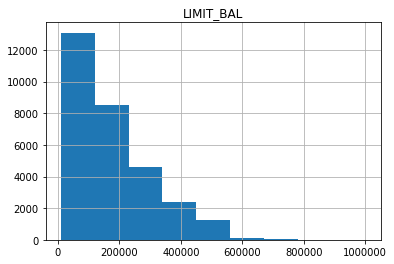

In [251]:
tmp=df[['LIMIT_BAL']].hist(bins=9)



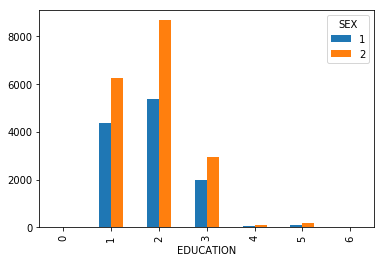

In [65]:
# (8) построить зависимость кредитного лимита от образования для каждого пола
# график необходимо сделать очень широким (на весь экран)
df #TODO

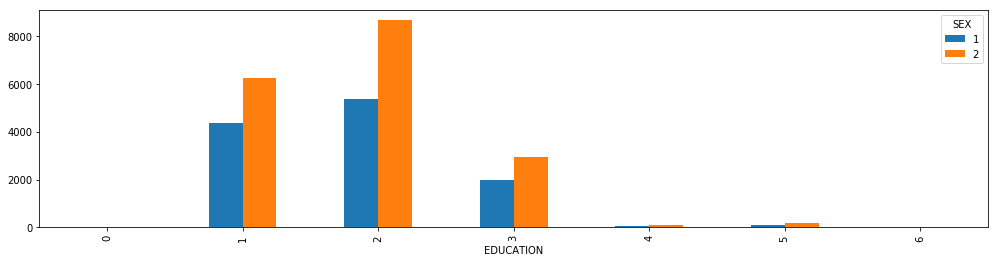

In [288]:
#df[ df['SEX']==1][['LIMIT_BAL','AGE','EDUCATION']]
#sex1=df[ df['SEX']==1][['EDUCATION']]
#sex2=df[ df['SEX']==2][['EDUCATION']]

fig, ax = plt.subplots(figsize=(17,4))
df.pivot_table('ID', 'EDUCATION', 'SEX', 'count').plot(kind='bar', stacked=False, ax=ax)

In [66]:
# (9) построить зависимость кредитного лимита и образования только для одного из полов

#TODO

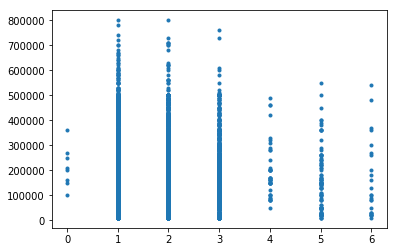

In [311]:
sex1=df[ df['SEX']==1][['EDUCATION','LIMIT_BAL']]

plt.plot(
    sex1['EDUCATION'],
    sex1['LIMIT_BAL'],
    '.')

In [312]:
# (10) построить большой график (подсказка - используя seaborn) для построения завимисости всех возможных пар параметров
# разным цветом выделить разные значение "default payment next month"
# (но так как столбцов много - картинка может получиться "монструозной")
# (поэкспериментируйте над тем как построить подобное сравнение параметров)
# (подсказка - ответ может состоять из несколькольких графиков)
# (если не выйдет - программа минимум - построить один график со всеми параметрами)
import seaborn

#TODO

In [313]:
import seaborn as sns

In [316]:
df2=df.drop(['ID', 'A-F'], axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6                     30000 non-null float64
PAY_AMT1  

In [320]:
r1=df[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'default.payment.next.month' ]]                          
r2=df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6' , 'default.payment.next.month']]
r3=df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'default.payment.next.month']]
r4=df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default.payment.next.month' ]]

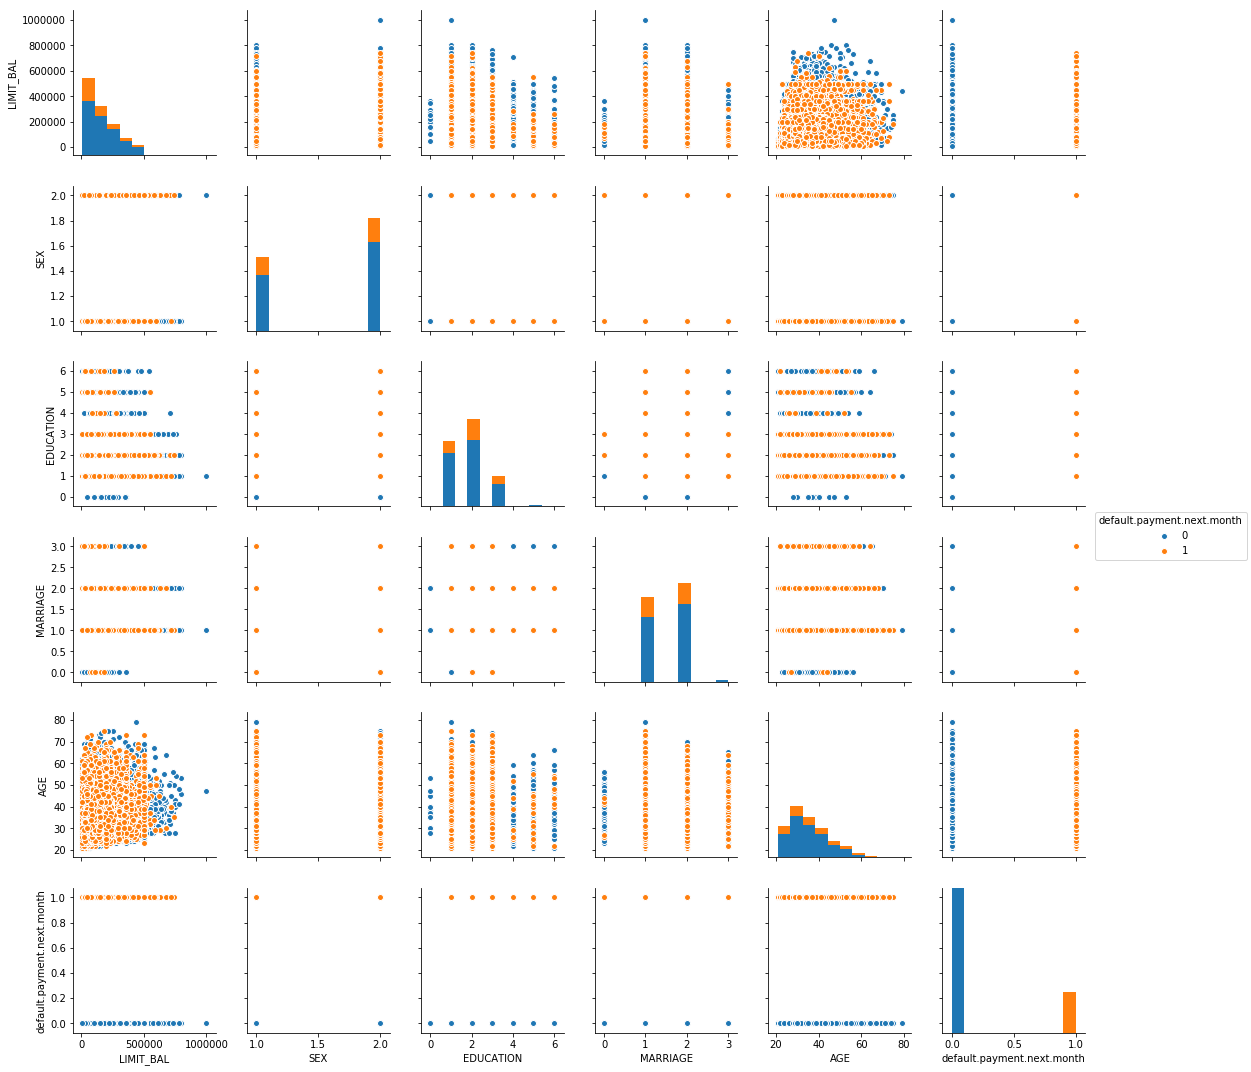

In [321]:
sns.pairplot(r1, hue='default.payment.next.month')

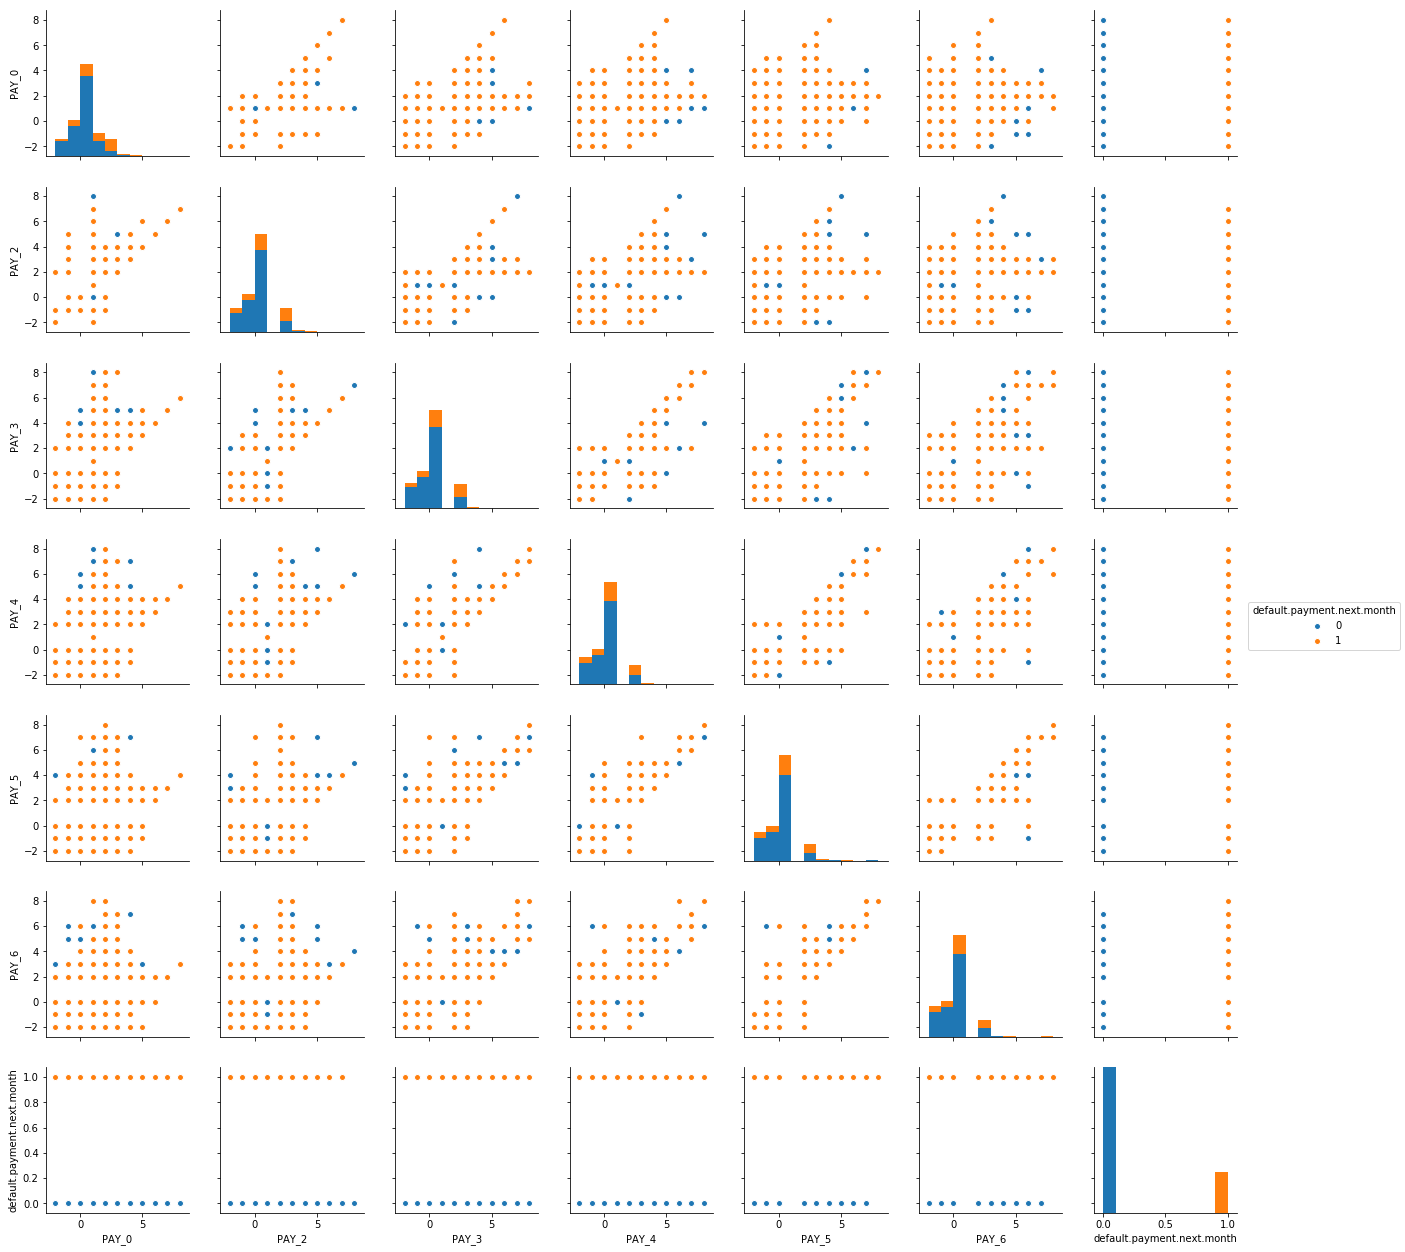

In [322]:
sns.pairplot(r2, hue='default.payment.next.month')

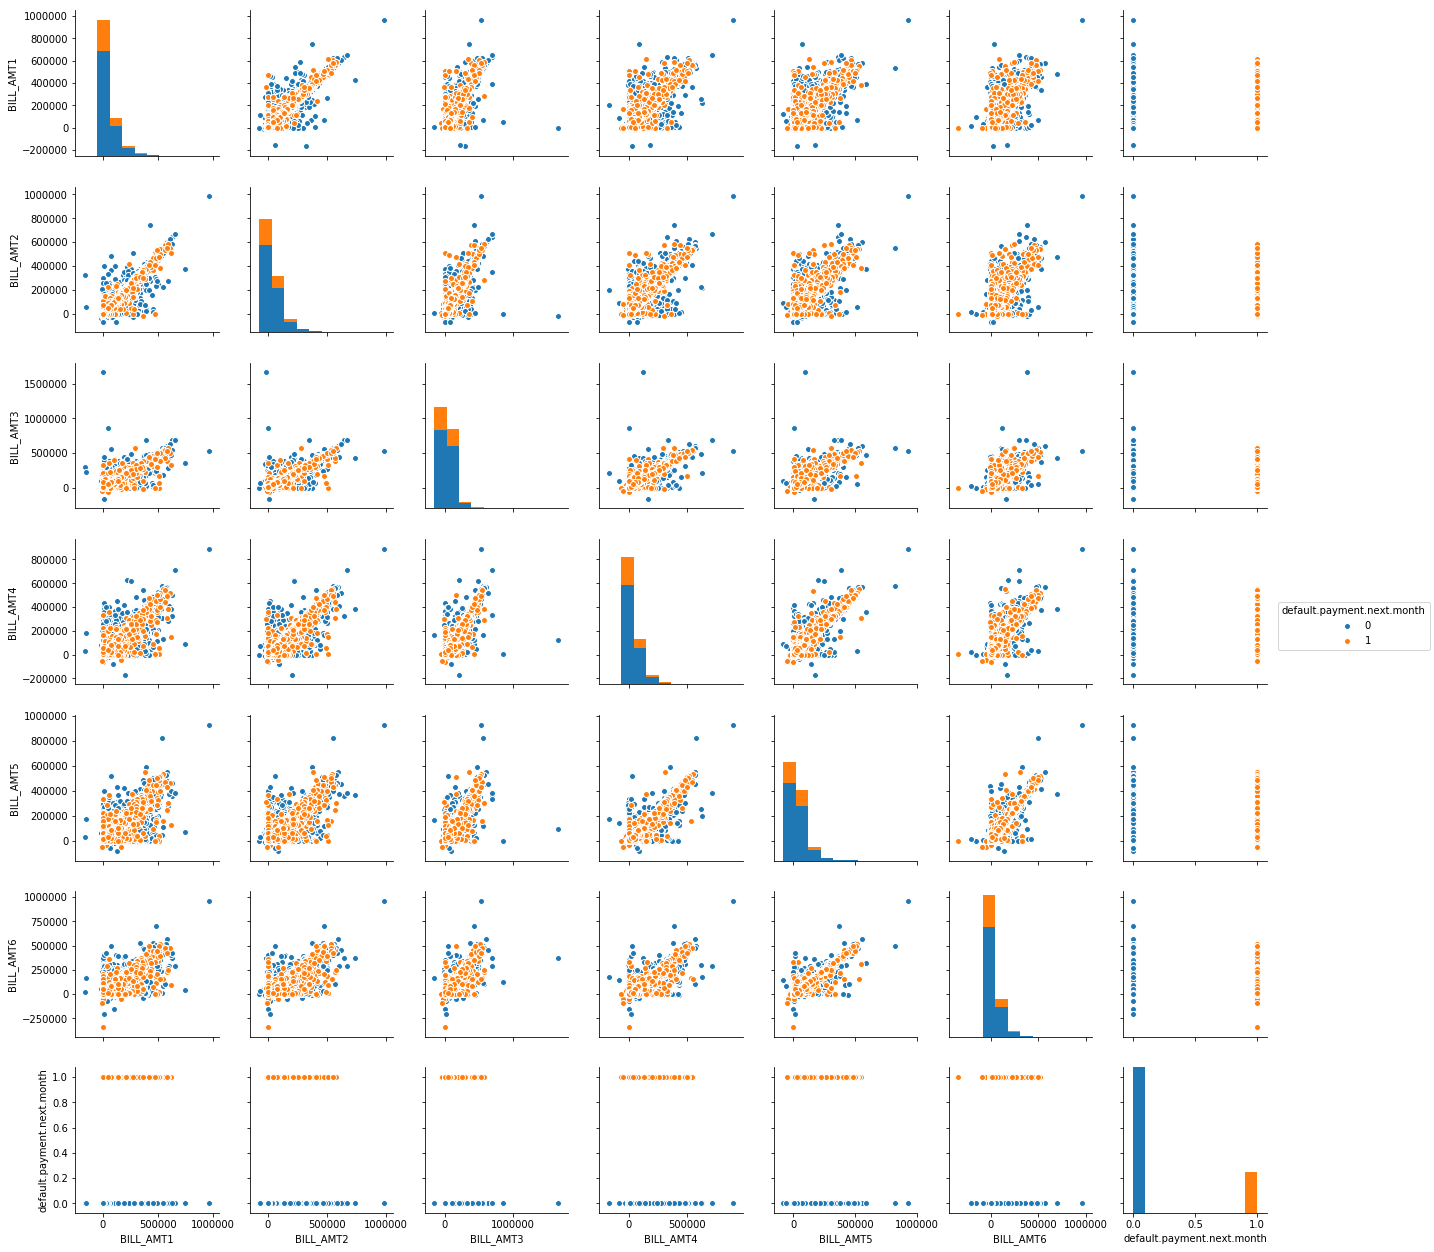

In [323]:
sns.pairplot(r3, hue='default.payment.next.month')

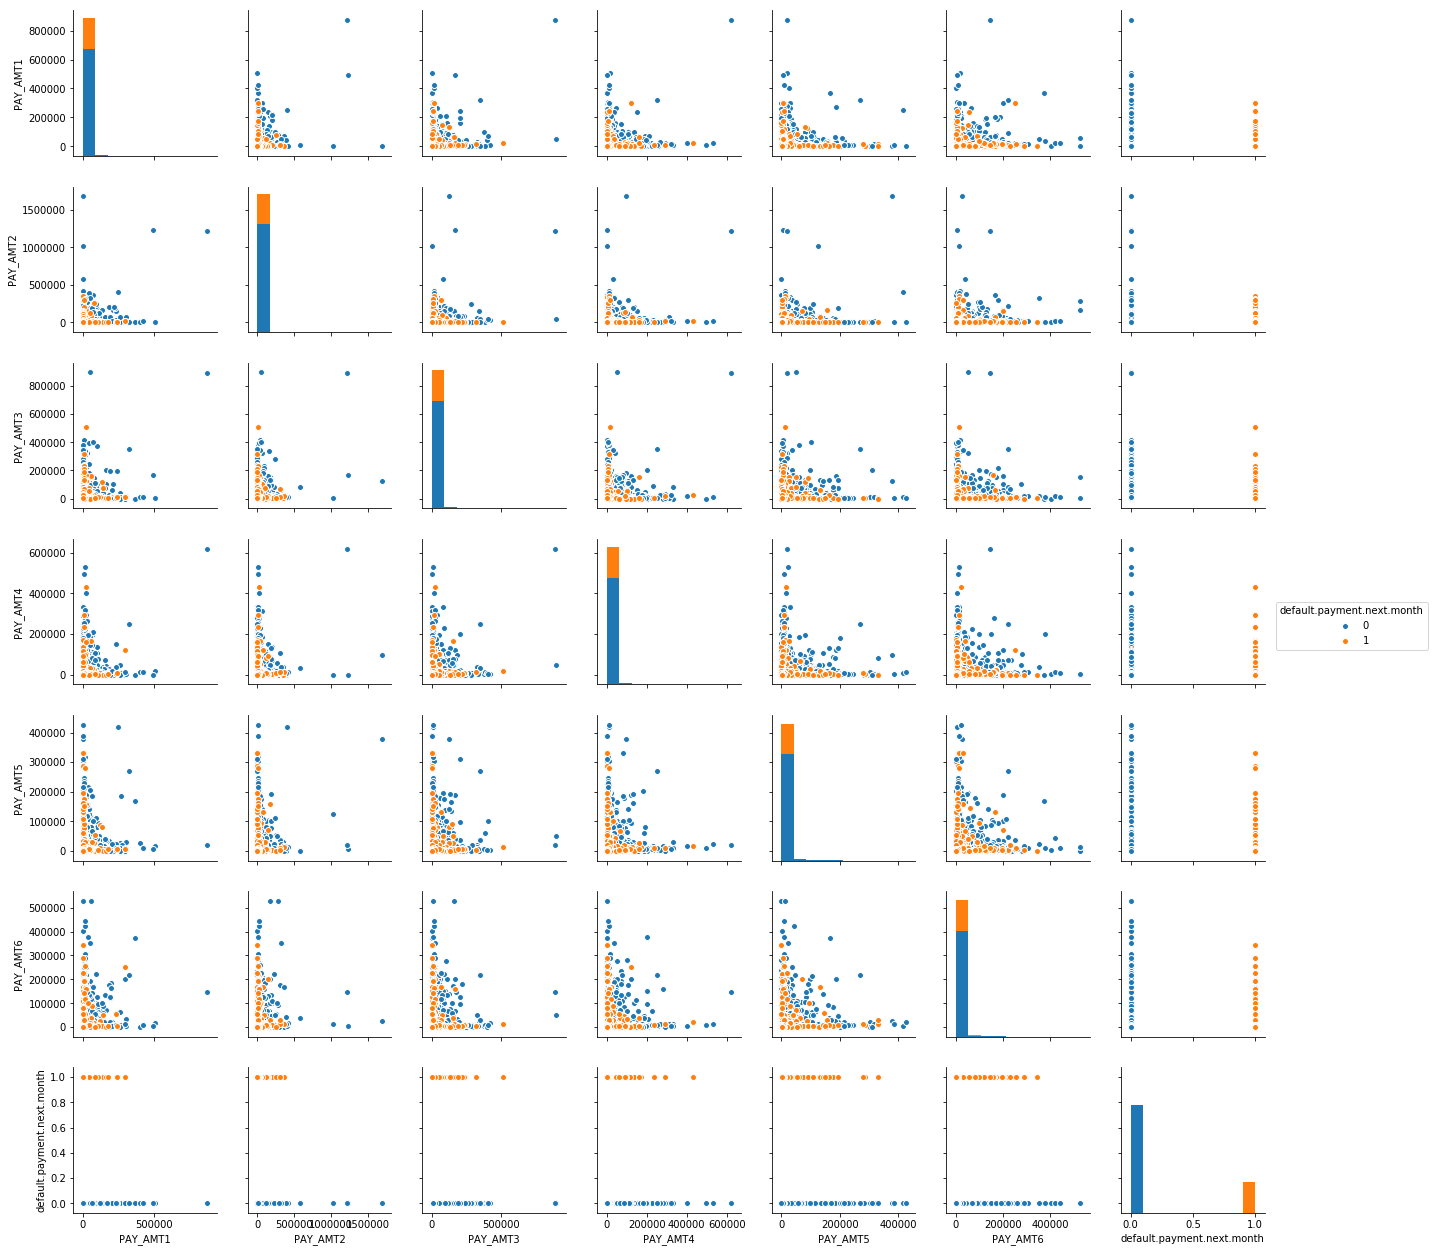

In [324]:
sns.pairplot(r4, hue='default.payment.next.month')